## The Sparks Foundation-GRIP - Data Science and Business Analytics - 'May 2023'

 > ### Author : Vivek Kumar
 > ### Task 5 : Exploratory Data Analysis - Sports

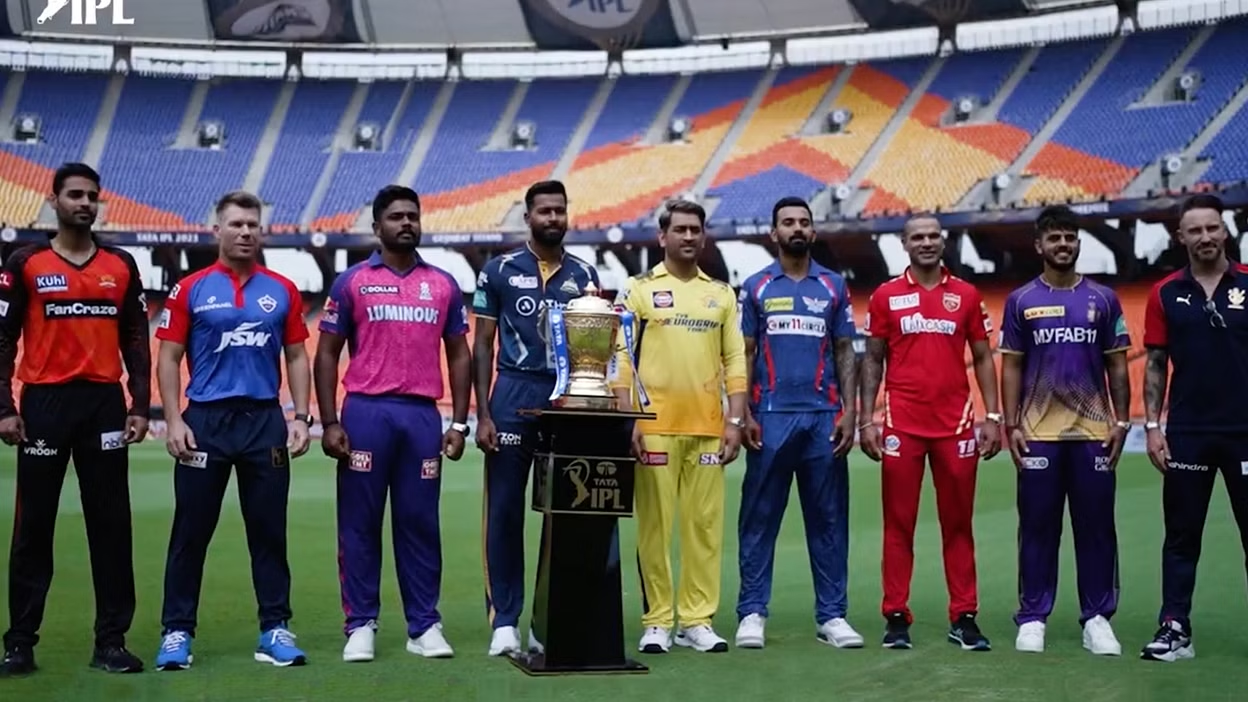

In this task, as a sports analysts, I have been given two datasets of ipl matches. The first one is deliveries and second one is matches.
This Dataset contains the record of ipl matches ball-by-ball from 2008 to 2019.

In deliveries dataset, I have record of each ball delivered in 20 overs from match 1 to match 11415 between 2008 to 2019.
In matches dataset, we have record of each team.

___________________________________________________________________________________________________________________________
### Task to Do:
 > As a sports analysts, I have to find out the most successfull teams, players and
 > I have to analyse the factors contributing win or loss of a team.
 > Also, I have to suggest teams or players a company should endorse for its products.

In [1]:
# Importing the Required Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
import plotly.graph_objects as go
#pd.set_option('display.max_rows', None)

In [3]:
# Loading and Reading the Datset

In [4]:
deliveries = pd.read_csv("deliveries.csv")
matches = pd.read_csv("matches.csv")

In [5]:
deliveries.head()

match_id  inning         batting_team                 bowling_team  over  \
0         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
1         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
2         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
3         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
4         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   

   ball    batsman non_striker    bowler  is_super_over  wide_runs  bye_runs  \
0     1  DA Warner    S Dhawan  TS Mills              0          0         0   
1     2  DA Warner    S Dhawan  TS Mills              0          0         0   
2     3  DA Warner    S Dhawan  TS Mills              0          0         0   
3     4  DA Warner    S Dhawan  TS Mills              0          0         0   
4     5  DA Warner    S Dhawan  TS Mills              0          2         0   

   legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
0            0            0             0             0           0   
1            0            0             0             0           0   
2            0            0             0             4           0   
3            0            0             0             0           0   
4            0            0             0             0           2   

   total_runs player_dismissed dismissal_kind fielder  
0           0              NaN            NaN     NaN  
1           0              NaN            NaN     NaN  
2           4              NaN            NaN     NaN  
3           0              NaN            NaN     NaN  
4           2              NaN            NaN     NaN

In [6]:
deliveries.tail()

match_id  inning         batting_team    bowling_team  over  ball  \
179073     11415       2  Chennai Super Kings  Mumbai Indians    20     2   
179074     11415       2  Chennai Super Kings  Mumbai Indians    20     3   
179075     11415       2  Chennai Super Kings  Mumbai Indians    20     4   
179076     11415       2  Chennai Super Kings  Mumbai Indians    20     5   
179077     11415       2  Chennai Super Kings  Mumbai Indians    20     6   

          batsman non_striker      bowler  is_super_over  wide_runs  bye_runs  \
179073  RA Jadeja   SR Watson  SL Malinga              0          0         0   
179074  SR Watson   RA Jadeja  SL Malinga              0          0         0   
179075  SR Watson   RA Jadeja  SL Malinga              0          0         0   
179076  SN Thakur   RA Jadeja  SL Malinga              0          0         0   
179077  SN Thakur   RA Jadeja  SL Malinga              0          0         0   

        legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
179073            0            0             0             1           0   
179074            0            0             0             2           0   
179075            0            0             0             1           0   
179076            0            0             0             2           0   
179077            0            0             0             0           0   

        total_runs player_dismissed dismissal_kind    fielder  
179073           1              NaN            NaN        NaN  
179074           2              NaN            NaN        NaN  
179075           1        SR Watson        run out  KH Pandya  
179076           2              NaN            NaN        NaN  
179077           0        SN Thakur            lbw        NaN

In [7]:
matches.head()

id  season       city        date                        team1  \
0   1    2017  Hyderabad  2017-04-05          Sunrisers Hyderabad   
1   2    2017       Pune  2017-04-06               Mumbai Indians   
2   3    2017     Rajkot  2017-04-07                Gujarat Lions   
3   4    2017     Indore  2017-04-08       Rising Pune Supergiant   
4   5    2017  Bangalore  2017-04-08  Royal Challengers Bangalore   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   
3              Kings XI Punjab              Kings XI Punjab         field   
4             Delhi Daredevils  Royal Challengers Bangalore           bat   

   result  dl_applied                       winner  win_by_runs  \
0  normal           0          Sunrisers Hyderabad           35   
1  normal           0       Rising Pune Supergiant            0   
2  normal           0        Kolkata Knight Riders            0   
3  normal           0              Kings XI Punjab            0   
4  normal           0  Royal Challengers Bangalore           15   

   win_by_wickets player_of_match                                      venue  \
0               0    Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal   
1               7       SPD Smith    Maharashtra Cricket Association Stadium   
2              10         CA Lynn     Saurashtra Cricket Association Stadium   
3               6      GJ Maxwell                     Holkar Cricket Stadium   
4               0       KM Jadhav                      M Chinnaswamy Stadium   

          umpire1        umpire2 umpire3  
0     AY Dandekar       NJ Llong     NaN  
1  A Nand Kishore         S Ravi     NaN  
2     Nitin Menon      CK Nandan     NaN  
3    AK Chaudhary  C Shamshuddin     NaN  
4             NaN            NaN     NaN

In [8]:
matches.tail()

id  season           city      date                  team1  \
751  11347    2019         Mumbai  05/05/19  Kolkata Knight Riders   
752  11412    2019        Chennai  07/05/19    Chennai Super Kings   
753  11413    2019  Visakhapatnam  08/05/19    Sunrisers Hyderabad   
754  11414    2019  Visakhapatnam  10/05/19         Delhi Capitals   
755  11415    2019      Hyderabad  12/05/19         Mumbai Indians   

                   team2          toss_winner toss_decision  result  \
751       Mumbai Indians       Mumbai Indians         field  normal   
752       Mumbai Indians  Chennai Super Kings           bat  normal   
753       Delhi Capitals       Delhi Capitals         field  normal   
754  Chennai Super Kings  Chennai Super Kings         field  normal   
755  Chennai Super Kings       Mumbai Indians           bat  normal   

     dl_applied               winner  win_by_runs  win_by_wickets  \
751           0       Mumbai Indians            0               9   
752           0       Mumbai Indians            0               6   
753           0       Delhi Capitals            0               2   
754           0  Chennai Super Kings            0               6   
755           0       Mumbai Indians            1               0   

    player_of_match                               venue        umpire1  \
751       HH Pandya                    Wankhede Stadium  Nanda Kishore   
752        AS Yadav           M. A. Chidambaram Stadium    Nigel Llong   
753         RR Pant                    ACA-VDCA Stadium            NaN   
754    F du Plessis                    ACA-VDCA Stadium  Sundaram Ravi   
755       JJ Bumrah  Rajiv Gandhi Intl. Cricket Stadium    Nitin Menon   

            umpire2                  umpire3  
751        O Nandan                   S Ravi  
752     Nitin Menon                Ian Gould  
753             NaN                      NaN  
754  Bruce Oxenford  Chettithody Shamshuddin  
755       Ian Gould              Nigel Llong

In [9]:
# Check for null values in matches dataset.
matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

## Data Cleaning
 > After looking at matches data, I need to perform some cleaning.
 1. I need to fill all the null city rows with 'Dubai'
 2. I need to replace 'Bengaluru' to 'Bangalore' in city column
 3. team1, team2, toss_winner, winner column's value to be replaced
    1. Rising Pune Supergiants to Rising Pune Supergiant
    2. Delhi Daredevils to Delhi Capitals
    
 > After looking at deliveries data, I also need to perform some data cleaning.
 1. batting_team, bowling_team column's value to be replaced
    1. Rising Pune Supergiants to Rising Pune Supergiant
    2. Delhi Daredevils to Delhi Capitals 
 

### matches dataset

In [10]:
matches[matches['city'].isnull()]

id  season city        date                        team1  \
461  462    2014  NaN  2014-04-19               Mumbai Indians   
462  463    2014  NaN  2014-04-19        Kolkata Knight Riders   
466  467    2014  NaN  2014-04-23          Chennai Super Kings   
468  469    2014  NaN  2014-04-25          Sunrisers Hyderabad   
469  470    2014  NaN  2014-04-25               Mumbai Indians   
474  475    2014  NaN  2014-04-28  Royal Challengers Bangalore   
476  477    2014  NaN  2014-04-30          Sunrisers Hyderabad   

                           team2                  toss_winner toss_decision  \
461  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
462             Delhi Daredevils        Kolkata Knight Riders           bat   
466             Rajasthan Royals             Rajasthan Royals         field   
468             Delhi Daredevils          Sunrisers Hyderabad           bat   
469          Chennai Super Kings               Mumbai Indians           bat   
474              Kings XI Punjab              Kings XI Punjab         field   
476               Mumbai Indians               Mumbai Indians         field   

     result  dl_applied                       winner  win_by_runs  \
461  normal           0  Royal Challengers Bangalore            0   
462  normal           0             Delhi Daredevils            0   
466  normal           0          Chennai Super Kings            7   
468  normal           0          Sunrisers Hyderabad            4   
469  normal           0          Chennai Super Kings            0   
474  normal           0              Kings XI Punjab            0   
476  normal           0          Sunrisers Hyderabad           15   

     win_by_wickets player_of_match                                venue  \
461               7        PA Patel  Dubai International Cricket Stadium   
462               4       JP Duminy  Dubai International Cricket Stadium   
466               0       RA Jadeja  Dubai International Cricket Stadium   
468               0        AJ Finch  Dubai International Cricket Stadium   
469               7       MM Sharma  Dubai International Cricket Stadium   
474               5  Sandeep Sharma  Dubai International Cricket Stadium   
476               0         B Kumar  Dubai International Cricket Stadium   

             umpire1         umpire2 umpire3  
461        Aleem Dar    AK Chaudhary     NaN  
462        Aleem Dar     VA Kulkarni     NaN  
466  HDPK Dharmasena  RK Illingworth     NaN  
468        M Erasmus          S Ravi     NaN  
469        BF Bowden       M Erasmus     NaN  
474        BF Bowden          S Ravi     NaN  
476  HDPK Dharmasena       M Erasmus     NaN

In [11]:
# Extracting all the index of null value.
null_index_value = matches[matches['city'].isnull()].index.values
null_index_value

array([461, 462, 466, 468, 469, 474, 476], dtype=int64)

In [12]:
# Accessing those row numbers to fill value.
matches.loc[null_index_value, 'city'] = 'Dubai'

In [13]:
matches[matches['city'].isnull()]

Empty DataFrame
Columns: [id, season, city, date, team1, team2, toss_winner, toss_decision, result, dl_applied, winner, win_by_runs, win_by_wickets, player_of_match, venue, umpire1, umpire2, umpire3]
Index: []

In [14]:
# Replacing the value
matches['city'] = matches['city'].str.replace('Bengaluru','Bangalore')
matches['team1'] = matches['team1'].str.replace('Rising Pune Supergiants', 'Rising Pune Supergiant')
matches['team1'] = matches['team1'].str.replace('Delhi Daredevils', 'Delhi Capitals')
matches['team2'] = matches['team2'].str.replace('Rising Pune Supergiants', 'Rising Pune Supergiant')
matches['team2'] = matches['team2'].str.replace('Delhi Daredevils', 'Delhi Capitals')
matches['toss_winner'] = matches['toss_winner'].str.replace('Rising Pune Supergiants', 'Rising Pune Supergiant')
matches['toss_winner'] = matches['toss_winner'].str.replace('Delhi Daredevils', 'Delhi Capitals')
matches['winner'] = matches['winner'].str.replace('Rising Pune Supergiants', 'Rising Pune Supergiant')
matches['winner'] = matches['winner'].str.replace('Delhi Daredevils', 'Delhi Capitals')

### Deliveries Dataset

In [15]:
# Replacing the values
deliveries['batting_team'] = deliveries['batting_team'].str.replace('Rising Pune Supergiants', 'Rising Pune Supergiant')
deliveries['batting_team'] = deliveries['batting_team'].str.replace('Delhi Daredevils', 'Delhi Capitals')
deliveries['bowling_team'] = deliveries['bowling_team'].str.replace('Rising Pune Supergiants', 'Rising Pune Supergiant')
deliveries['bowling_team'] = deliveries['bowling_team'].str.replace('Delhi Daredevils', 'Delhi Capitals')

## Data Preprocessing

Here, after looking at both datasets, I decided to merge both datasets, it will help me in further analysis.

In [16]:
# merging deliveries and matches datasets
ipl = deliveries.merge(matches, left_on='match_id', right_on='id')

In [17]:
ipl.sample(5)

match_id  inning            batting_team                 bowling_team  \
58843       249       1         Deccan Chargers              Kings XI Punjab   
2045          9       2  Rising Pune Supergiant               Delhi Capitals   
63496       268       2           Pune Warriors  Royal Challengers Bangalore   
84074       356       1         Deccan Chargers  Royal Challengers Bangalore   
80788       342       2          Mumbai Indians               Delhi Capitals   

       over  ball       batsman    non_striker          bowler  is_super_over  \
58843     8     5      S Dhawan  KC Sangakkara       R McLaren              0   
2045      5     5    MA Agarwal   F du Plessis          Z Khan              0   
63496    15     2  Yuvraj Singh     RV Uthappa        A Mithun              0   
84074    18     2      S Dhawan       CL White  P Parameswaran              0   
80788    20     4    SL Malinga       RP Singh        UT Yadav              0   

       wide_runs  bye_runs  legbye_runs  noball_runs  penalty_runs  \
58843          0         0            0            0             0   
2045           0         0            0            0             0   
63496          0         0            0            0             0   
84074          0         0            0            0             0   
80788          0         0            0            0             0   

       batsman_runs  extra_runs  total_runs player_dismissed dismissal_kind  \
58843             4           0           4              NaN            NaN   
2045              0           0           0       MA Agarwal         caught   
63496             0           0           0              NaN            NaN   
84074             2           0           2              NaN            NaN   
80788             1           0           1              NaN            NaN   

         fielder   id  season       city        date  \
58843        NaN  249    2011  Hyderabad  2011-04-16   
2045   CH Morris    9    2017       Pune  2017-04-11   
63496        NaN  268    2011  Bangalore  2011-04-29   
84074        NaN  356    2012  Bangalore  2012-05-06   
80788        NaN  342    2012      Delhi  2012-04-27   

                             team1                        team2  \
58843              Deccan Chargers              Kings XI Punjab   
2045                Delhi Capitals       Rising Pune Supergiant   
63496  Royal Challengers Bangalore                Pune Warriors   
84074              Deccan Chargers  Royal Challengers Bangalore   
80788               Delhi Capitals               Mumbai Indians   

                       toss_winner toss_decision  result  dl_applied  \
58843              Kings XI Punjab         field  normal           0   
2045        Rising Pune Supergiant         field  normal           0   
63496                Pune Warriors         field  normal           0   
84074  Royal Challengers Bangalore         field  normal           0   
80788               Mumbai Indians         field  normal           0   

                            winner  win_by_runs  win_by_wickets  \
58843              Kings XI Punjab            0               8   
2045                Delhi Capitals           97               0   
63496  Royal Challengers Bangalore           26               0   
84074  Royal Challengers Bangalore            0               5   
80788               Delhi Capitals           37               0   

      player_of_match                                      venue  \
58843     PC Valthaty  Rajiv Gandhi International Stadium, Uppal   
2045        SV Samson    Maharashtra Cricket Association Stadium   
63496         V Kohli                      M Chinnaswamy Stadium   
84074  AB de Villiers                      M Chinnaswamy Stadium   
80788        V Sehwag                           Feroz Shah Kotla   

               umpire1       umpire2 umpire3  
58843      RE Koertzen        S Ravi     NaN  
2045       AY Dandekar        S Ravi     NaN  
63496        Alee

## Understanding the Dataset

In [18]:
# Fetch all the column names.
ipl.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder', 'id', 'season', 'city', 'date', 'team1',
       'team2', 'toss_winner', 'toss_decision', 'result', 'dl_applied',
       'winner', 'win_by_runs', 'win_by_wickets', 'player_of_match', 'venue',
       'umpire1', 'umpire2', 'umpire3'],
      dtype='object')

In [19]:
# Getting the shape of data
ipl.shape

(179078, 39)

In [20]:
# Getting info about the datsets
ipl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179078 entries, 0 to 179077
Data columns (total 39 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [21]:
# Remove unnecessary columns.
ipl = ipl.drop(columns=['id','umpire1', 'umpire2','umpire3'], axis=1)

In [22]:
# converting data type of date columns to datetime.
ipl['date'] = pd.to_datetime(ipl['date'])

In [23]:
# Simple Statistical Analysis
ipl.describe()

match_id         inning           over           ball  \
count  179078.000000  179078.000000  179078.000000  179078.000000   
mean     1802.252957       1.482952      10.162488       3.615587   
std      3472.322805       0.502074       5.677684       1.806966   
min         1.000000       1.000000       1.000000       1.000000   
25%       190.000000       1.000000       5.000000       2.000000   
50%       379.000000       1.000000      10.000000       4.000000   
75%       567.000000       2.000000      15.000000       5.000000   
max     11415.000000       5.000000      20.000000       9.000000   

       is_super_over      wide_runs       bye_runs    legbye_runs  \
count  179078.000000  179078.000000  179078.000000  179078.000000   
mean        0.000452       0.036721       0.004936       0.021136   
std         0.021263       0.251161       0.116480       0.194908   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       5.000000       4.000000       5.000000   

         noball_runs   penalty_runs   batsman_runs     extra_runs  \
count  179078.000000  179078.000000  179078.000000  179078.000000   
mean        0.004183       0.000056       1.246864       0.067032   
std         0.070492       0.016709       1.608270       0.342553   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       1.000000       0.000000   
75%         0.000000       0.000000       1.000000       0.000000   
max         5.000000       5.000000       7.000000       7.000000   

          total_runs         season     dl_applied    win_by_runs  \
count  179078.000000  179078.000000  179078.000000  179078.000000   
mean        1.313897    2013.444510       0.017914      13.404036   
std         1.605422       3.363947       0.132639      23.261007   
min         0.000000    2008.000000       0.000000       0.000000   
25%         0.000000    2011.000000       0.000000       0.000000   
50%         1.000000    2013.000000       0.000000       0.000000   
75%         1.000000    2016.000000       0.000000      19.000000   
max        10.000000    2019.000000       1.000000     146.000000   

       win_by_wickets  
count   179078.000000  
mean         3.261579  
std          3.347033  
min          0.000000  
25%          0.000000  
50%          3.000000  
75%          6.000000  
max         10.000000

In [24]:
# Observing each value of a column.
for i in ipl.columns:
    print("Column name is: ",i)
    print(ipl[i].value_counts())
    print("--"*20)
    print("--"*20)

Column name is:  match_id
126      267
34       263
534      262
476      262
388      261
        ... 
120      108
568      106
452      100
301       63
11340     51
Name: match_id, Length: 756, dtype: int64
----------------------------------------
----------------------------------------
Column name is:  inning
1    92742
2    86240
3       50
4       38
5        8
Name: inning, dtype: int64
----------------------------------------
----------------------------------------
Column name is:  batting_team
Mumbai Indians                 22619
Kings XI Punjab                20931
Royal Challengers Bangalore    20908
Kolkata Knight Riders          20858
Delhi Capitals                 20695
Chennai Super Kings            19762
Rajasthan Royals               17292
Sunrisers Hyderabad            12908
Deccan Chargers                 9034
Pune Warriors                   5443
Gujarat Lions                   3566
Rising Pune Supergiant          3480
Kochi Tuskers Kerala            1582
Name: ba

# Data Analysis and Visualizations

In our first analysis, I have to find out the most successfull teams, players name.

### 1. Most Successful Teams

In [25]:
# How many matches were played in each season

In [26]:
matches_per_season = matches.pivot_table(index='season',values='id', aggfunc='count').reset_index()

In [27]:
matches_per_season

season  id
0     2008  58
1     2009  57
2     2010  60
3     2011  73
4     2012  74
5     2013  76
6     2014  60
7     2015  59
8     2016  60
9     2017  59
10    2018  60
11    2019  60

In [28]:
px.line(x = matches_per_season['season'],
        y = matches_per_season['id'],
       title='Number of Matches Per Season',
       text = matches_per_season['id'],
       labels = {
           'x':'Season',
           'y':'Number of Matches'
       })

In [29]:
# Which teams have played the most matches?

In [30]:
team_name = []
total_matches = []
for i in matches['team1'].unique():
    team_name.append(i)
    total_matches.append(matches[(matches['team1'] == i) | (matches['team2'] == i)]['id'].count())    
most_played_matches = {
    'team_name':team_name,
    'total_matches':total_matches
}
most_played_matches = pd.DataFrame(most_played_matches)

In [31]:
most_played_matches.sort_values('total_matches', ascending = False).head(5)

team_name  total_matches
1               Mumbai Indians            187
4  Royal Challengers Bangalore            180
5        Kolkata Knight Riders            178
6               Delhi Capitals            177
7              Kings XI Punjab            176

### Conclusions
> As you can see, According to this dataset, Top 5 most successful teams are Mumbai Indians, Royal Challengers Bangalore,Kolkata Knight Riders, Delhi Capitals, Kings XI Punjab.
> Lets Visualize it.

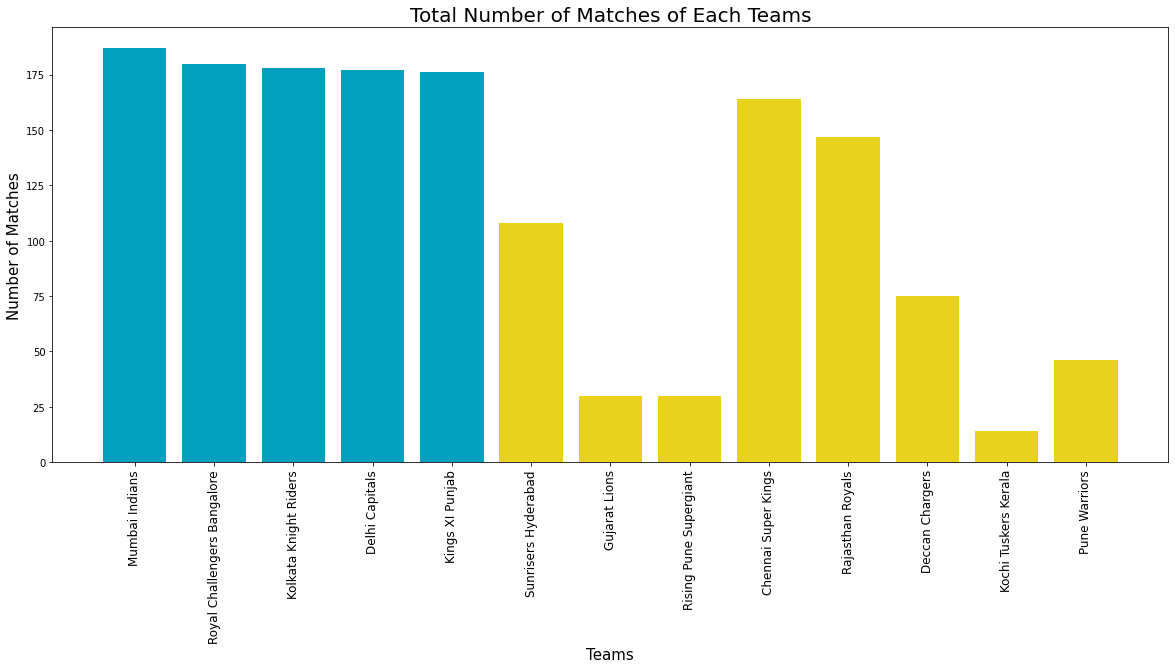

In [32]:
mask1 = most_played_matches['total_matches'].values > 175
mask2 = most_played_matches['total_matches'].values < 175
x = most_played_matches['team_name'].values
y = most_played_matches['total_matches'].values
plt.figure(figsize=(20,8))
plt.bar(x[mask1], y[mask1], color='#039fbe')
plt.bar(x[mask2], y[mask2], color='#e8d21d')
plt.xticks(rotation=90, fontsize=12)
plt.xlabel('Teams', size=15)
plt.ylabel('Number of Matches', size=15)
plt.title('Total Number of Matches of Each Teams', size=20)
plt.show()

In [33]:
# Out of total Number of Matches, How many matches teams have won? What is the winning percentage?

In [34]:
team_name = []
total_matches = []
total_wins = []
for i in matches['team1'].unique():
    team_name.append(i)
    total_matches.append(matches[(matches['team1'] == i) | (matches['team2'] == i)]['id'].count()) 
    total_wins.append(matches[matches['winner'] == i]['winner'].count())
    
most_played_matches = {
    'team_name':team_name,
    'total_matches':total_matches,
    'total_wins':total_wins
}
most_played_matches = pd.DataFrame(most_played_matches).sort_values('total_wins', ascending=False)

In [35]:
most_played_matches.head(5)

team_name  total_matches  total_wins
1               Mumbai Indians            187         109
8          Chennai Super Kings            164         100
5        Kolkata Knight Riders            178          92
4  Royal Challengers Bangalore            180          84
7              Kings XI Punjab            176          82

### Conclusions
> As you can see, According to this dataset, Top 5 most successful teams according to, how many matches they have won out of total are Mumbai Indians, Chennai Super Kings, Kolkata Knight Riders, Royal Challengers Banglore, Kings XI Punjab.
> Lets Visualize it.

In [36]:
fig = go.Figure(data=[
    go.Bar(name = 'Total_matches', x=most_played_matches['team_name'], y = most_played_matches['total_matches']),
    go.Bar(name = 'Total_wins', x=most_played_matches['team_name'], y = most_played_matches['total_wins'])
])
# Change the bar mode
fig.update_layout(barmode='stack')
fig.show()

In [37]:
# Teams winning Percentage

In [38]:
team_name = []
winning_percentage = []
for i in matches['team1'].unique():
    team_name.append(i)
    winning_percentage.append(round(matches[matches['winner'] == i]['winner'].count()/
                              matches[(matches['team1'] == i) | (matches['team2'] == i)]['id'].count(),3)*100)
most_played_matches = {
    'team_name':team_name,
    'winning_percentage': winning_percentage
}
percentage_won_rate = pd.DataFrame(most_played_matches).sort_values('winning_percentage', ascending=False)

In [39]:
percentage_won_rate.head(5)

team_name  winning_percentage
8    Chennai Super Kings                61.0
1         Mumbai Indians                58.3
0    Sunrisers Hyderabad                53.7
5  Kolkata Knight Riders                51.7
9       Rajasthan Royals                51.0

### Conclusions
> As you can see, According to this dataset, Top 5 most successful teams in terms of winning percent rate are Chennai Super Kings, Mumbai Indians, Sunrisers Hyderabad,Kolkata Knight Riders, Rajasthan Royals.
> Lets Visualize it.

In [40]:
fig = px.bar(percentage_won_rate, y='winning_percentage', x='team_name', text_auto='.3s',
            title="Winning Percentage of Teams in IPL History")
fig.show()

In [41]:
# Which team won the most ipl titles - (finals)

In [42]:
index = []
for finals in matches['season'].sort_values().unique():
    index.append(matches[matches['season'] == finals].tail(1).index.values[0])

In [43]:
final = matches[matches.index.isin(index)].sort_values('season')

In [44]:
most_titles = final.groupby("winner")['winner'].count().sort_values(ascending=False)
most_titles

winner
Mumbai Indians           4
Chennai Super Kings      3
Kolkata Knight Riders    2
Deccan Chargers          1
Rajasthan Royals         1
Sunrisers Hyderabad      1
Name: winner, dtype: int64

### Conclusions
> As you can see, According to this dataset, Team **Mumbai Indians** have won the most titles in IPL history. Then After Chennai Super Kings. Now Let's make a pie chart.

In [45]:
fig = go.Figure(data=[go.Pie(labels=most_titles.index, values=most_titles.values, pull=[0.1, 0.05, 0.0, 0])])
fig.update_layout(title = 'Teams with Most Number of IPL Titles')
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(line=dict(color='#000000', width=0.5)))
fig.show()

In [46]:
# What is the highest number of times a team has become a finalist in the IPL history?

In [47]:
Sunrisers_Hyderabad = 0
Royal_Challengers_Bangalore = 0
Mumbai_Indians = 0
Rising_Pune_Supergiant = 0
Gujarat_Lions = 0
Kolkata_Knight_Riders = 0
Kings_XI_Punjab = 0
Delhi_Capitals = 0
Chennai_Super_Kings = 0
Rajasthan_Royals = 0
Deccan_Chargers = 0
Kochi_Tuskers_Kerala = 0
Pune_Warriors = 0

In [48]:
for i in final['team1']:
    if i == 'Sunrisers Hyderabad':
        Sunrisers_Hyderabad += 1
    elif i == 'Royal Challengers Bangalore':
        Royal_Challengers_Bangalore += 1
    elif i == 'Mumbai Indians':
        Mumbai_Indians += 1
    elif i == 'Rising Pune Supergiant':
        Rising_Pune_Supergiant += 1
    elif i == 'Gujarat Lions':
        Gujarat_Lions += 1
    elif i == 'Kolkata Knight Riders':
        Kolkata_Knight_Riders += 1
    elif i == 'Kings XI Punjab':
        Kings_XI_Punjab += 1
    elif i == 'Delhi Capitals':
        Delhi_Capitals += 1
    elif i == 'Chennai Super Kings':
        Chennai_Super_Kings += 1
    elif i == 'Rajasthan Royals':
        Rajasthan_Royals += 1
    elif i == 'Deccan Chargers':
        Deccan_Chargers += 1
    elif i == 'Kochi Tuskers Kerala':
        Kochi_Tuskers_Kerala += 1
    elif i == 'Pune Warriors':
        Pune_Warriors += 1

In [49]:
for j in final['team2']:
    if j == 'Sunrisers Hyderabad':
        Sunrisers_Hyderabad += 1
    elif j == 'Royal Challengers Bangalore':
        Royal_Challengers_Bangalore += 1
    elif j == 'Mumbai Indians':
        Mumbai_Indians += 1
    elif j == 'Rising Pune Supergiant':
        Rising_Pune_Supergiant += 1
    elif j == 'Gujarat Lions':
        Gujarat_Lions += 1
    elif j == 'Kolkata Knight Riders':
        Kolkata_Knight_Riders += 1
    elif j == 'Kings XI Punjab':
        Kings_XI_Punjab += 1
    elif j == 'Delhi Capitals':
        Delhi_Capitals += 1
    elif j == 'Chennai Super Kings':
        Chennai_Super_Kings += 1
    elif j == 'Rajasthan Royals':
        Rajasthan_Royals += 1
    elif j == 'Deccan Chargers':
        Deccan_Chargers += 1
    elif j == 'Kochi Tuskers Kerala':
        Kochi_Tuskers_Kerala += 1
    elif j == 'Pune Warriors':
        Pune_Warriors += 1

In [50]:
finalist = {
    'Sunrisers Hyderabad':[Sunrisers_Hyderabad],
    'Royal Challengers Bangalore':[Royal_Challengers_Bangalore],
    'Mumbai Indians':[Mumbai_Indians],
    'Rising Pune Supergiant':[Rising_Pune_Supergiant],
    'Gujarat Lions':[Gujarat_Lions],
    'Kolkata Knight Riders':[Kolkata_Knight_Riders],
    'Kings XI Punjab':[Kings_XI_Punjab],
    'Delhi Capitals':[Delhi_Capitals],
    'Chennai Super Kings':[Chennai_Super_Kings],
    'Rajasthan Royals':[Rajasthan_Royals],
    'Deccan Chargers':[Deccan_Chargers],
    'Kochi Tuskers Kerala':[Kochi_Tuskers_Kerala],
    'Pune Warriors':[Pune_Warriors]
}

In [51]:
finalist_teams = pd.DataFrame(finalist).melt(var_name='Teams', value_name='Count').sort_values('Count', ascending = False)
finalist_teams

Teams  Count
8           Chennai Super Kings      8
2                Mumbai Indians      5
1   Royal Challengers Bangalore      3
0           Sunrisers Hyderabad      2
5         Kolkata Knight Riders      2
3        Rising Pune Supergiant      1
6               Kings XI Punjab      1
9              Rajasthan Royals      1
10              Deccan Chargers      1
4                 Gujarat Lions      0
7                Delhi Capitals      0
11         Kochi Tuskers Kerala      0
12                Pune Warriors      0

### Conclusions
> As you can see, According to this dataset, Team **Chennai Super Kings** have the highest number of becoming finalist, then after is **Mumbai Indians**. Lets visualize it.

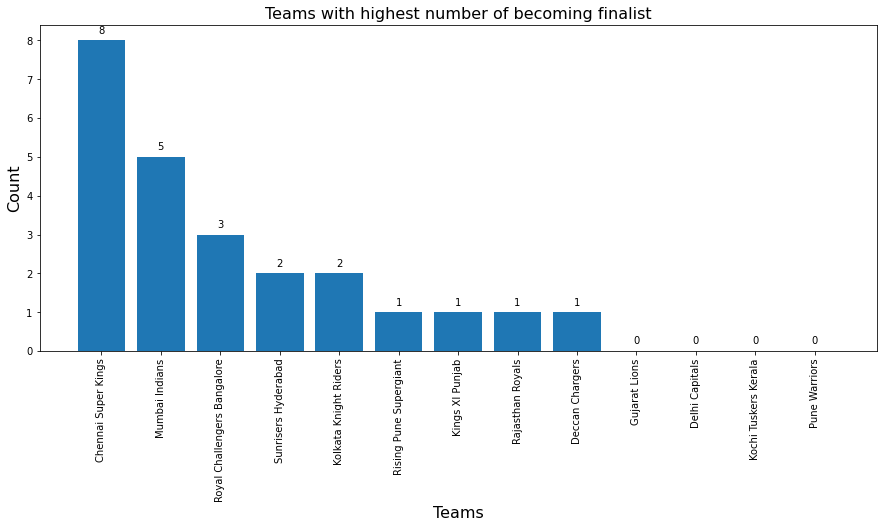

In [52]:
plt.figure(figsize=(15,6))
plt.bar(finalist_teams.Teams, finalist_teams.Count)
plt.xticks(rotation=90)
plt.title("Teams with highest number of becoming finalist", size=16)
plt.xlabel('Teams', size=16)
plt.ylabel('Count', size=16)
ax = plt.gca()
for p in ax.containers:
    ax.bar_label(p, label_type='edge', fontsize=10, padding=5)
plt.show()

In [53]:
# Which Teams Have Won The Most Matches After Losing The Toss?

In [54]:
Teams = []
loss_toss_times = []
total_wins = []
for i in matches['team1'].unique():
    Teams.append(i)
    x = matches[(matches['team1'] == i) | (matches['team2'] == i)]
    loss_toss_times.append(x[x['toss_winner'] != i]['toss_winner'].count())
    total_wins.append(x[(x['toss_winner'] != i) & (x['winner'] == i)]['winner'].count())


In [55]:
x = {
    'teams':Teams,
    'loss_toss_times':loss_toss_times,
    'total_wins':total_wins
}

In [56]:
df = pd.DataFrame(x).sort_values('total_wins', ascending=False)
df

teams  loss_toss_times  total_wins
1                Mumbai Indians               89          53
7               Kings XI Punjab               95          47
4   Royal Challengers Bangalore               99          43
8           Chennai Super Kings               75          43
5         Kolkata Knight Riders               86          39
0           Sunrisers Hyderabad               62          35
6                Delhi Capitals               87          35
9              Rajasthan Royals               67          33
10              Deccan Chargers               32          10
12                Pune Warriors               26           9
3        Rising Pune Supergiant               17           7
2                 Gujarat Lions               15           3
11         Kochi Tuskers Kerala                6           2

### Conclusions
> As you can see, According to this dataset, Team **Mumbai Indians** has won the most matches after loosing the toss.
Lets visualize it.

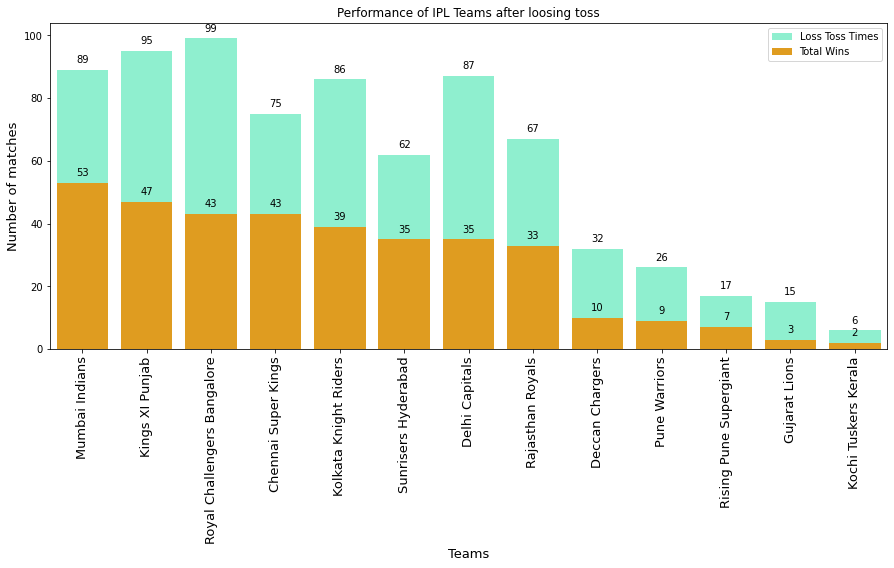

In [57]:
plt.figure(figsize=(15, 6))
#sns.set_style('whitegrid')
sns.barplot(x='teams', y='loss_toss_times', data=df, color='#7FFFD4', label='Loss Toss Times')
sns.barplot(x='teams', y='total_wins', data=df, color='orange', label='Total Wins')
plt.xticks(rotation=90, size=13)
plt.xlabel('Teams', size=13)
plt.ylabel('Number of matches', size=13)
plt.title('Performance of IPL Teams after loosing toss')
plt.legend()

# Add the values at the top of each bar
ax = plt.gca()
for p in ax.containers:
    ax.bar_label(p, label_type='edge', fontsize=10, padding=5)

plt.show()

# Final Conclusion

> From this entire analysis above, I found that **Mumbai Indians** is the most successful team in IPL history. Then comes **Chennai Super Kings**.

### 2. Most Successful Players Name

After finding, the most successful teams, now we will find most successful players name in IPL.

In [58]:
# Top batters with most runs in IPL history

In [59]:
batsman = []
innings = []
total_runs = []
for i in ipl['batsman'].unique():
    batsman.append(i)
    innings.append(len(ipl[ipl['batsman'] == i]['match_id'].unique()))
    total_runs.append(ipl[ipl['batsman'] == i]['batsman_runs'].sum())

In [60]:
x = {
    'Batsman':batsman,
    'Innings':innings,
    'Total Runs':total_runs
}

In [61]:
temp_df = pd.DataFrame(x).sort_values('Total Runs', ascending=False).head()

In [62]:
temp_df

Batsman  Innings  Total Runs
87    V Kohli      169        5434
33   SK Raina      189        5415
19  RG Sharma      182        4914
0   DA Warner      126        4741
1    S Dhawan      158        4632

### Conclusions
> As you can see, According to this dataset, **Virat Kohli** is the player who has scored maximum run in ipl history. And then comes **SK Raina, RG Sharma, DA Warner, S Dhawan**.

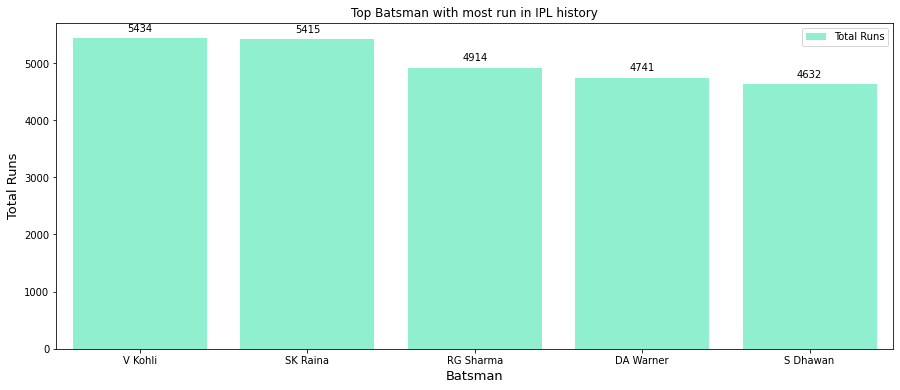

In [63]:
plt.figure(figsize=(15, 6))
#sns.set_style('whitegrid')
sns.barplot(x='Batsman', y='Total Runs', data=temp_df, color='#7FFFD4', label='Total Runs')
plt.xlabel('Batsman', size=13)
plt.ylabel('Total Runs', size=13)
plt.title('Top Batsman with most run in IPL history')
plt.legend()

# Add the values at the top of each bar
ax = plt.gca()
for p in ax.containers:
    ax.bar_label(p, label_type='edge', fontsize=10, padding=5)

plt.show()

In [64]:
# Which Player holds the highest strike rate in IPL history

In [65]:
batsman = []
total_runs_scored = []
total_balls_faced = []
strike_rate = []
for i in ipl['batsman'].unique():
    batsman.append(i)
    total_runs_scored.append(ipl[ipl['batsman'] == i]['batsman_runs'].sum())
    total_balls_faced.append(ipl[ipl['batsman'] == i]['ball'].count())
    strike_rate.append((ipl[ipl['batsman'] == i]['batsman_runs'].sum()/ipl[ipl['batsman'] == i]['ball'].count())*100)

In [66]:
temp_df = pd.DataFrame({
    'batsman':batsman,
    'total_runs_scored':total_runs_scored,
    'total_balls_faced':total_balls_faced,
    'strike_rate':strike_rate
})

In [67]:
temp_df.sort_values(['strike_rate', 'total_runs_scored'], ascending=[False, False])
# It is triky to find, because bolwer is also there as a batsman. So, if he play less ball, and also score less, then
# strike rate will be high.

batsman  total_runs_scored  total_balls_faced  strike_rate
468    B Stanlake                  5                  2   250.000000
220      Umar Gul                 39                 19   205.263158
502      S Sharma                  8                  4   200.000000
340      RS Sodhi                  4                  2   200.000000
407    AD Russell               1445                803   179.950187
..            ...                ...                ...          ...
459     S Kaushik                  0                  1     0.000000
501  S Lamichhane                  0                  1     0.000000
508       J Denly                  0                  1     0.000000
510       K Ahmed                  0                  1     0.000000
514         P Raj                  0                  1     0.000000

[516 rows x 4 columns]

In [68]:
# Top players(bowlers) with most wickets in IPL history

In [69]:
ipl['dismissal_kind'].unique()

array([nan, 'caught', 'bowled', 'run out', 'lbw', 'caught and bowled',
       'stumped', 'retired hurt', 'hit wicket', 'obstructing the field'],
      dtype=object)

In [70]:
bowler = []
matches_played = []
total_wickets = []
for i in ipl['bowler'].unique():
    bowler.append(i)
    matches_played.append(len(ipl[(ipl['bowler'] == i)]['match_id'].unique()))
    total_wickets.append(ipl[(ipl['bowler'] == i) 
    & ((~ipl['dismissal_kind'].isnull())&(ipl['dismissal_kind'] != 'run out'))]['dismissal_kind'].count())

In [71]:
temp_df = pd.DataFrame({
    'bowler':bowler,
    'matches_played':matches_played,
    'total_wickets':total_wickets
}).sort_values('total_wickets', ascending=False).head()
temp_df

bowler  matches_played  total_wickets
58        SL Malinga             122            170
50          A Mishra             147            156
59   Harbhajan Singh             157            150
27         PP Chawla             156            149
147         DJ Bravo             131            147

### Conclusions
> As you can see, According to this dataset, **SL Malinga** is the best bowler in IPL history. Because in very few matches, he has taken most wickets. Lets visualize it.

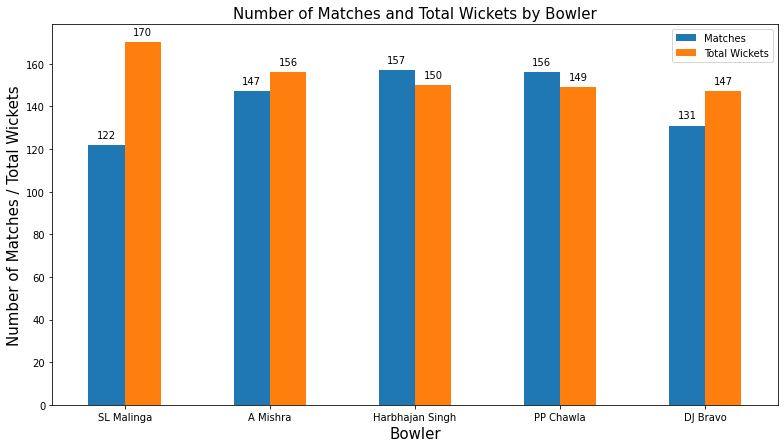

In [72]:
#temp_df.set_index('bowler').plot(kind='bar', figsize=(10,6), rot=0)
ax = temp_df.set_index('bowler').plot(kind='bar', figsize=(13,7), rot=0)
ax.set_xlabel('Bowler', size=15)
ax.set_ylabel('Number of Matches / Total Wickets', size=15)
ax.set_title('Number of Matches and Total Wickets by Bowler', size = 15)
ax.legend(['Matches', 'Total Wickets'])
ax = plt.gca()
for p in ax.containers:
    ax.bar_label(p, label_type='edge', fontsize=10, padding=5)
plt.show()

## Now I have to analyse the factors contributing win or loss of a IPL team

In [73]:
matches['city'].unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah',
       'Dubai', 'Mohali'], dtype=object)

In [74]:
matches['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Capitals', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors'], dtype=object)

### **1** - What is the winning and loosing rate of a Team when it plays in his own home town.

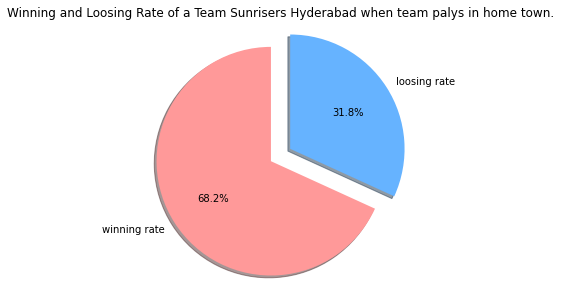

In [75]:
def fetch_data(team, city):
    
    win_home_rate = matches[((matches['team1'] == team) | 
        (matches['team2'] == team)) &
        (matches['city'] == city) &
        (matches['winner'] == team)]['winner'].count()
    
    loss_home_rate = matches[((matches['team1'] == team) | 
        (matches['team2'] == team)) &
        (matches['city'] == city) &
        (matches['winner'] != team)]['winner'].count()

    a = pd.DataFrame({
        'team':[team],
        'winning rate':[win_home_rate],
        'loosing rate':[loss_home_rate]
    }).set_index('team').melt()
    
    explode = (0.1, 0.1)#add colors
    colors = ['#ff9999','#66b3ff']
    fig1, ax1 = plt.subplots()
    ax1.pie(a.value, explode=explode, labels=a.variable, colors=colors, autopct='%1.1f%%',
            shadow=True, startangle=90)# Equal aspect ratio ensures that pie is drawn as a circle
    ax1.axis('equal')
    plt.tight_layout()
    plt.title("Winning and Loosing Rate of a Team " + str(team)+ " when team palys in home town.")
    return plt.show()
fetch_data('Sunrisers Hyderabad','Hyderabad')

### Conclusions
> After analysing most of the teams, I have got a factor that, winning rate increases when the team plays in his home town.

### **2** - What is the winning and loosing rate of a Team when it plays away from his home town.

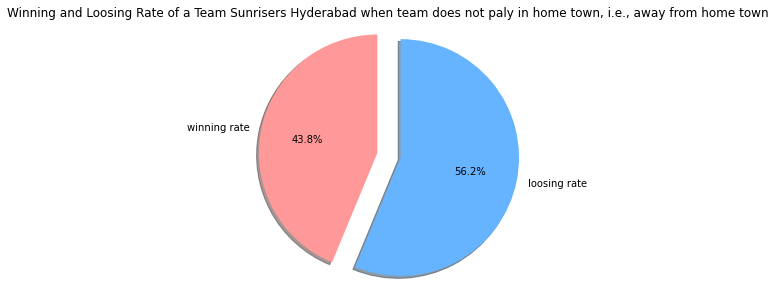

In [76]:
def fetch_data(team, city):
    
    win_home_rate = matches[((matches['team1'] == team) | 
        (matches['team2'] == team)) &
        (matches['city'] != city) &
        (matches['winner'] == team)]['winner'].count()
    
    loss_home_rate = matches[((matches['team1'] == team) | 
        (matches['team2'] == team)) &
        (matches['city'] != city) &
        (matches['winner'] != team)]['winner'].count()

    a = pd.DataFrame({
        'team':[team],
        'winning rate':[win_home_rate],
        'loosing rate':[loss_home_rate]
    }).set_index('team').melt()
    
    explode = (0.1, 0.1)#add colors
    colors = ['#ff9999','#66b3ff']
    fig1, ax1 = plt.subplots()
    ax1.pie(a.value, explode=explode, labels=a.variable, colors=colors, autopct='%1.1f%%',
            shadow=True, startangle=90)# Equal aspect ratio ensures that pie is drawn as a circle
    ax1.axis('equal')
    plt.tight_layout()
    plt.title("Winning and Loosing Rate of a Team " + str(team)+ " when team does not paly in home town, i.e., away from home town")
    return plt.show()
fetch_data('Sunrisers Hyderabad','Hyderabad')

### Conclusions
> After analysing most of the teams, I have got a factor that, winning rate decreases when the team plays in his home town.
Means, winning rate increases when the team plays away from his home town.

### **3** - What is the Winning and loosing Rate of a team, if a team scores greater than 200.

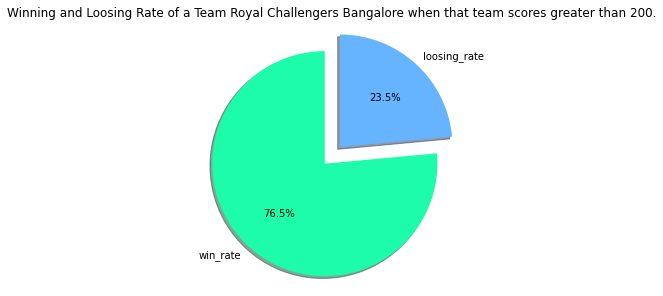

In [77]:
def get_data(team):
    df = ipl[ipl['batting_team'] == team].groupby('match_id')['total_runs'].sum().reset_index()
    df = df.merge(matches, left_on='match_id', right_on='id')[['match_id', 'total_runs', 'winner']]
    win_percent = df[df['total_runs'] > 200]
    x = win_percent[win_percent['winner'] == team]['winner'].count()
    y = win_percent[win_percent['winner'] != team]['winner'].count()
    
    a = pd.DataFrame({
        'Team':team,
        'win_rate':[x],
        'loosing_rate':[y]
    }).set_index('Team').melt()
    
    explode = (0.1, 0.1)#add colors
    colors = ['#1cfcaa','#66b3ff']
    fig1, ax1 = plt.subplots()
    ax1.pie(a.value, explode=explode, labels=a.variable, colors=colors, autopct='%1.1f%%',
            shadow=True, startangle=90)# Equal aspect ratio ensures that pie is drawn as a circle
    ax1.axis('equal')
    plt.tight_layout()
    plt.title("Winning and Loosing Rate of a Team " + str(team)+ " when that team scores greater than 200.")
    return plt.show()
get_data('Royal Challengers Bangalore')

### Conclusion
> After analysing most of the teams, I have got a factor that, winning rate increases if a team score greater than 200.

### **4** - What is the Winning and loosing Rate of a team, if a team scores less than 200.

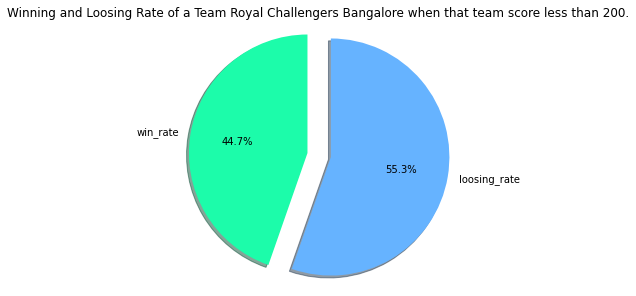

In [78]:
def get_data(team):
    df = ipl[ipl['batting_team'] == team].groupby('match_id')['total_runs'].sum().reset_index()
    df = df.merge(matches, left_on='match_id', right_on='id')[['match_id', 'total_runs', 'winner']]
    win_percent = df[df['total_runs'] < 200]
    x = win_percent[win_percent['winner'] == team]['winner'].count()
    y = win_percent[win_percent['winner'] != team]['winner'].count()
    
    a = pd.DataFrame({
        'Team':team,
        'win_rate':[x],
        'loosing_rate':[y]
    }).set_index('Team').melt()
    
    explode = (0.1, 0.1)#add colors
    colors = ['#1cfcaa','#66b3ff']
    fig1, ax1 = plt.subplots()
    ax1.pie(a.value, explode=explode, labels=a.variable, colors=colors, autopct='%1.1f%%',
            shadow=True, startangle=90)# Equal aspect ratio ensures that pie is drawn as a circle
    ax1.axis('equal')
    plt.tight_layout()
    plt.title("Winning and Loosing Rate of a Team " + str(team)+ " when that team score less than 200.")
    return plt.show()
get_data('Royal Challengers Bangalore')

### Conclusion
> After analysing most of the teams, I have got a factor that, winning rate decreases if a team score less than 200.

### **5** - if a team win a toss and select to bat, then what is the probability of win or loss in a match.

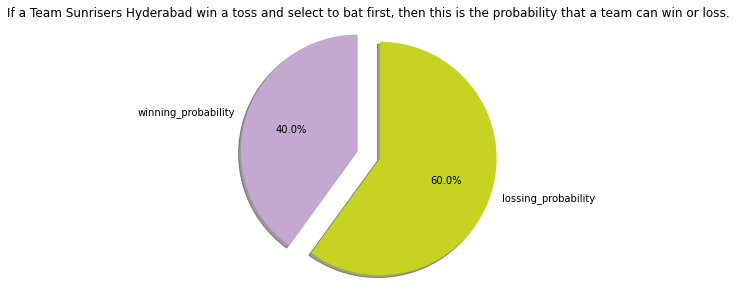

In [79]:
def get_insight_3(team):
    win_rate = matches[((matches['team1'] == team) | 
        (matches['team2'] == team)) & 
        (matches['toss_winner'] == team) & 
        (matches['toss_decision'] == 'bat')  & (matches['winner'] == team)]['winner'].count()
    
    loss_rate = matches[((matches['team1'] == team) | 
        (matches['team2'] == team)) & 
        (matches['toss_winner'] == team) & 
        (matches['toss_decision'] == 'bat')  & (matches['winner'] != team)]['winner'].count()
    
    x = pd.DataFrame({
        'Team':team,
        'winning_probability':[win_rate],
        'lossing_probability':[loss_rate]
    }).set_index('Team').melt()
    
    explode = (0.1, 0.1)#add colors
    colors = ['#c4a8cf','#c7d323']
    fig1, ax1 = plt.subplots()
    ax1.pie(x.value, explode=explode, labels=x.variable, colors=colors, autopct='%1.1f%%',
            shadow=True, startangle=90)# Equal aspect ratio ensures that pie is drawn as a circle
    ax1.axis('equal')
    plt.tight_layout()
    plt.title("If a Team " + str(team)+ " win a toss and select to bat first, then this is the probability that a team can win or loss.")
    
    
    return plt.show()
get_insight_3('Sunrisers Hyderabad')    

### Conclusion
> After analysing a team, I have got a factor that, if a team win a toss and select to bat first then the probability of winning a game is less than probability of loosing a game.
So, this is a factor that is somehow contributes win or loss of a team

### **6** - if a team win a toss and select to field first, then what is the probability of win or loss in a match.

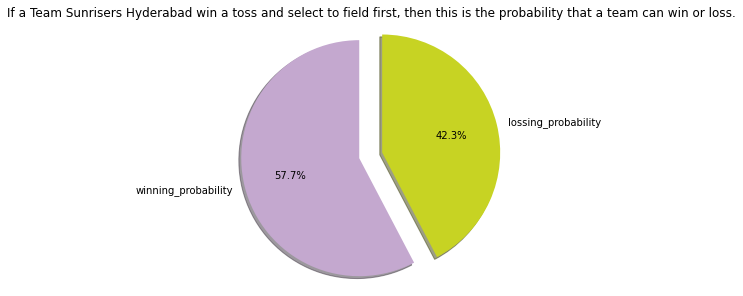

In [80]:
def get_insight_3(team):
    win_rate = matches[((matches['team1'] == team) | 
        (matches['team2'] == team)) & 
        (matches['toss_winner'] == team) & 
        (matches['toss_decision'] == 'field')  & (matches['winner'] == team)]['winner'].count()
    
    loss_rate = matches[((matches['team1'] == team) | 
        (matches['team2'] == team)) & 
        (matches['toss_winner'] == team) & 
        (matches['toss_decision'] == 'field')  & (matches['winner'] != team)]['winner'].count()
    
    x = pd.DataFrame({
        'Team':team,
        'winning_probability':[win_rate],
        'lossing_probability':[loss_rate]
    }).set_index('Team').melt()
    
    explode = (0.1, 0.1)#add colors
    colors = ['#c4a8cf','#c7d323']
    fig1, ax1 = plt.subplots()
    ax1.pie(x.value, explode=explode, labels=x.variable, colors=colors, autopct='%1.1f%%',
            shadow=True, startangle=90)# Equal aspect ratio ensures that pie is drawn as a circle
    ax1.axis('equal')
    plt.tight_layout()
    plt.title("If a Team " + str(team)+ " win a toss and select to field first, then this is the probability that a team can win or loss.")
    
    
    return plt.show()
get_insight_3('Sunrisers Hyderabad')    

### Conclusion
> After analysing a team, I have got a factor that, if a team win a toss and select to field first then the probability of winning a game is more than probability of loosing a game.
So, this is a factor that is somehow contributes win or loss of a team.

# Final Approach

> If I have to suggest teams, I would suggest **Mumbai Indians** or **Chennai Super Kings.**
> And the players name will be **Virat Kohli** to company to endorse for its products.

# Thank You